In [88]:
%cd /home/michael/code/python/datathon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

pdp = pd.read_csv("pdp_data.csv")
bflies = pd.read_csv("butterflies_data.csv")

cncavgs = {}
pesticides = set()
concentration_normalized_averages = pdp.groupby('year')['concentration_normalized'].mean()
pdp = pdp[pdp['concentration'].notna()]
for i in pdp["pesticide_name"]:
    pesticides.add(i)

/home/michael/virpy/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/michael/code/python/datathon


In [22]:
bflies.groupby('year')['number'].sum().reset_index()

,year,number
0,1997,630
1,1998,764
2,1999,1138
3,2000,1200
4,2001,2189
5,2002,1900
6,2003,9647
7,2004,2560
8,2005,59330
9,2006,12391


In [23]:
bflies.groupby('year')['number'].sum().reset_index()

,year,number
0,1997,630
1,1998,764
2,1999,1138
3,2000,1200
4,2001,2189
5,2002,1900
6,2003,9647
7,2004,2560
8,2005,59330
9,2006,12391


In [17]:
bflies.groupby('year')['number'].sum().reset_index()

,year,number
0,1997,630
1,1998,764
2,1999,1138
3,2000,1200
4,2001,2189
5,2002,1900
6,2003,9647
7,2004,2560
8,2005,59330
9,2006,12391


In [19]:
# pdp['year'] = np.where(
#     (pdp['year'] >= 0) & (pdp['year'] <= 20),
#     2000 + pdp['year'],
#     np.where(
#         (pdp['year'] > 20) & (pdp['year'] <= 99),
#         1900 + pdp['year'],
#         np.nan
#     ))
# pdp['year'] = pdp['year'].astype(int)
# pdp.dropna()

In [24]:
pdp['year'] = pdp['year'].astype(int)

In [25]:
pdp.head()

,sample_id,state,year,concentration,pesticide_code,pesticide_name,max_concentration,concentration_normalized
0,MO9701140340WHUS3,MO,1997,0.033,52,Malathion,331.0,0.000100
1,CA9701060304AJCA1,CA,1997,0.330,157,Thiabendazole,7.4,0.044595
2,CA9701070112AJCA1,CA,1997,0.013,42,Azinphos methyl,45.0,0.000289
3,CA9701070112AJCA1,CA,1997,0.310,157,Thiabendazole,7.4,0.041892
4,CA9702240307AJCA1,CA,1997,0.640,157,Thiabendazole,7.4,0.086486


In [26]:
pdp.dropna()

,sample_id,state,year,concentration,pesticide_code,pesticide_name,max_concentration,concentration_normalized
0,MO9701140340WHUS3,MO,1997,0.0330,52,Malathion,331.000,0.000100
1,CA9701060304AJCA1,CA,1997,0.3300,157,Thiabendazole,7.400,0.044595
2,CA9701070112AJCA1,CA,1997,0.0130,42,Azinphos methyl,45.000,0.000289
3,CA9701070112AJCA1,CA,1997,0.3100,157,Thiabendazole,7.400,0.041892
4,CA9702240307AJCA1,CA,1997,0.6400,157,Thiabendazole,7.400,0.086486
...,...,...,...,...,...,...,...,...
514135,TX2001130216BNOH1,TX,2020,0.0072,B48,Azoxystrobin,662.000,0.000011
514136,TX2006010216BNOH1P,TX,2020,0.0033,B48,Azoxystrobin,662.000,0.000005
514137,TX2010050108BNOH1P,TX,2020,0.0068,B48,Azoxystrobin,662.000,0.000010
514138,TX2006010216BNOH1P,TX,2020,0.0172,B52,Buprofezin,4.959,0.003468


In [ ]:
pdp.to_csv("pdp_data.csv")

In [ ]:
bflies['year'] = np.where(
    (bflies['year'] >= 0) & (bflies['year'] <= 20),
    2000 + bflies['year'],
    np.where(
        (bflies['year'] > 20) & (bflies['year'] <= 99),
        1900 + bflies['year'],
        np.nan
    ))


In [ ]:
bflies['year'] = bflies['year'].astype(int)

In [ ]:
bflies.dropna()
bflies.head()

In [ ]:
bflies.to_csv("butterflies_data.csv")

In [ ]:
for s in pesticides:
    pdp['concentration_max']

In [27]:
pdp['maxconcentration'] = pdp.groupby('pesticide_name')['concentration'].transform('max')

In [ ]:
pdp

In [28]:
pdp['pesticide_use_normalized'] = pdp['concentration']/pdp['maxconcentration']

In [ ]:
pdp.to_csv("pdp_data.csv")

In [29]:
years = set()

for i in pdp['year']:
    years.add(i)

In [30]:
years

{1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020}

In [31]:
concentration_normalized_averages = pdp.groupby('year')['concentration_normalized'].mean()

In [40]:
concentration_normalized_averages

year
1997    0.028982
1998    0.032435
1999    0.024809
2000    0.021284
2001    0.027064
2002    0.027148
2003    0.019262
2004    0.023628
2005    0.025634
2006    0.015573
2007    0.016467
2008    0.027779
2009    0.031521
2010    0.025336
2011    0.020210
2012    0.022169
2013    0.013871
2014    0.014586
2015    0.025066
2016    0.024625
2017    0.023281
2018    0.016306
2019    0.024238
2020    0.013772
Name: concentration_normalized, dtype: float64

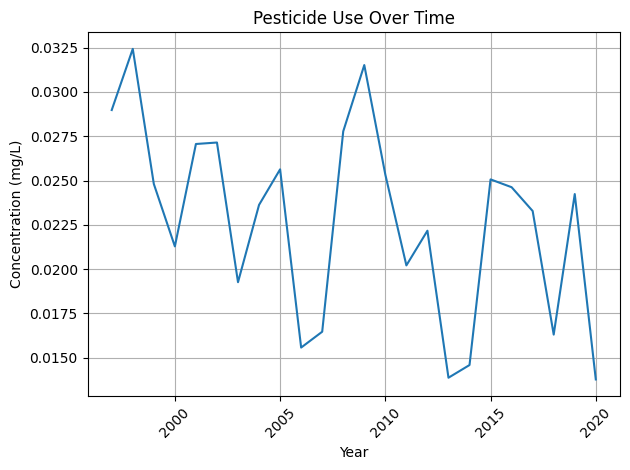

In [34]:
plt.plot(concentration_normalized_averages)
plt.title('Pesticide Use Over Time')
plt.xlabel('Year')
plt.ylabel('Concentration (mg/L)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
comb = pd.DataFrame()
comb['year'] = pdp['year']

In [36]:
butterflies_seen_per_year = bflies.groupby('year')['number'].sum()
butterflies_seen_per_year

year
1997         630
1998         764
1999        1138
2000        1200
2001        2189
2002        1900
2003        9647
2004        2560
2005       59330
2006       12391
2007     4095271
2008       75570
2009      223173
2010      364817
2011      169849
2012      333005
2013       41712
2014    10154245
2015      499086
2016      178521
2017      264112
2018     1780968
2019      625262
2020      459691
Name: number, dtype: int64

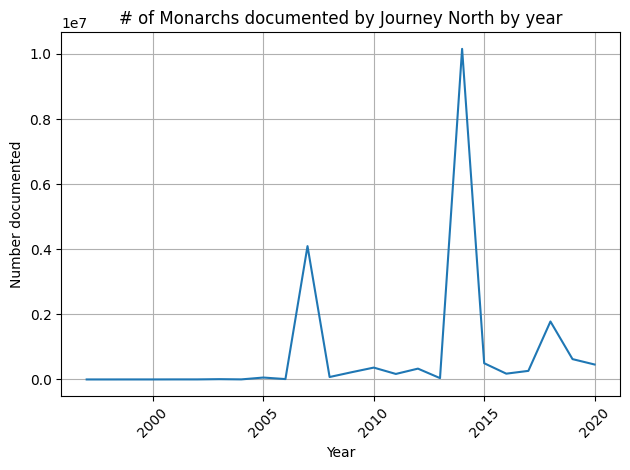

In [37]:
plt.plot(butterflies_seen_per_year)
plt.title('# of Monarchs documented by Journey North by year')
plt.xlabel('Year')
plt.ylabel('Number documented')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

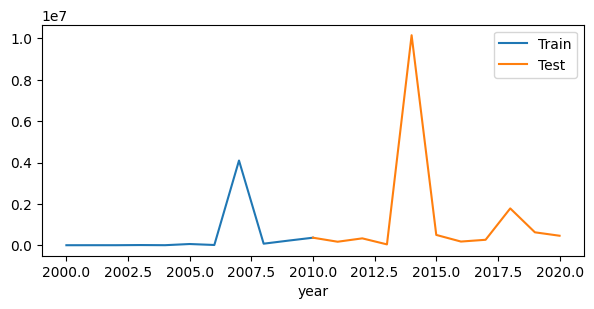

In [45]:
train_start = '2000'
train_end = '2010'

test_start = '2010'
test_end = '2020'

forecast_start = '2020'
forecast_end = '2024'

fig, ax = plt.subplots(figsize=(7, 3))
butterflies_seen_per_year.loc[train_start:train_end].plot(ax=ax, label = "Train")
butterflies_seen_per_year.loc[test_start:test_end].plot(ax=ax, label = "Test")
ax.legend()

/home/michael/virpy/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/michael/virpy/lib/python3.12/site-packages/skforecast/utils/utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/michael/virpy/lib/python3.12/site-packages/skforecast/utils/utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


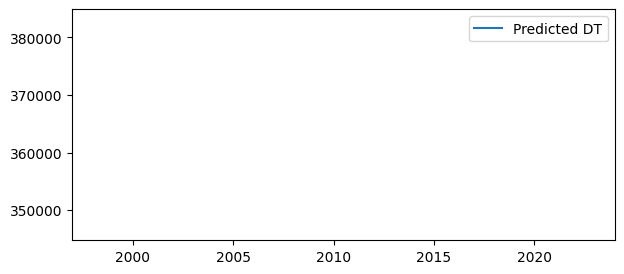

In [70]:
# Define the forecaster
forecaster = ForecasterAutoreg(
    # Add the sklearn regressor and lags
    regressor = DecisionTreeRegressor(random_state = 123),
    lags = 2
)

# Fit the model using train data
forecaster.fit(y = butterflies_seen_per_year.loc[train_start:train_end])

# Predict the test period
predicted_test = forecaster.predict(steps = len(butterflies_seen_per_year.loc[test_start:test_end]))

fig, ax = plt.subplots(figsize=(7, 3))
ax.set_xlim([1997, 2024])
#butterflies_seen_per_year.loc[train_start:forecast_end].plot(ax=ax, label = "Test")
predicted_test.plot(ax = ax, label = 'Predicted DT')
ax.legend()

In [57]:
ax.set_xlim([1997, 2020])

(1997.0, 2020.0)

In [71]:
print(predicted_test)

2     364817.0
3     364817.0
4     364817.0
5     364817.0
6     364817.0
7     364817.0
8     364817.0
9     364817.0
10    364817.0
11    364817.0
12    364817.0
Name: pred, dtype: float64


In [74]:
infant_mortality = pd.read_csv('/home/michael/Downloads/infant_2022.csv')


In [98]:
r2_pesticides_butterflies = r2_score(concentration_normalized_averages, butterflies_seen_per_year)


In [100]:
r2_pesticides_butterflies

-1.8181338154522227e+17

In [86]:
avg_per_year

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(6.9796000000000005),
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 np.float64(5.935),
 np.float64(6.1152),
 np.float64(6.0362),
 np.float64(5.925799999999999),
 np.float64(5.841),
 np.float64(5.76061224489796),
 np.float64(5.4910000000000005)]

In [83]:
infant_mortality = pd.read_csv('/home/michael/Downloads/infant_2022.csv')
infant_mortality = infant_mortality[infant_mortality.RATE != 'Unreliable']
infant_mortality['RATE'] = infant_mortality['RATE'].astype(float)
infant_mortality

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,6.69,389,/nchs/pressroom/states/alabama/al.htm
1,2022,AK,6.62,62,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,6.17,485,/nchs/pressroom/states/arizona/az.htm
3,2022,AR,7.67,272,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,4.11,1724,/nchs/pressroom/states/california/ca.htm
...,...,...,...,...,...
496,2005,VA,7.47,781,/nchs/pressroom/states/virginia/virginia.htm
497,2005,WA,5.07,419,/nchs/pressroom/states/washington/washington.htm
498,2005,WV,8.16,170,/nchs/pressroom/states/westvirginia/westvirgin...
499,2005,WI,6.54,464,/nchs/pressroom/states/wisconsin/wisconsin.htm


In [91]:
avg_per_year = []
for year in years:
    avg_per_year.append(infant_mortality[infant_mortality['YEAR'] == year]['RATE'].mean())


In [92]:
# Convert List to NumPy Array
np_data = np.array(avg_per_year)
print(f"Original NumPy Array: {np_data}")  # Output: [1.5 2.3 nan 4.7 nan 6.1]

# Step 1: Calculate the mean excluding NaNs
mean_val = np.nanmean(np_data)
print(f"Mean of non-NaN values: {mean_val}")  # Output: 3.68

# Step 2: Identify NaNs
nan_mask = np.isnan(np_data)
print(f"NaN Mask: {nan_mask}")  # Output: [False False  True False  True False]

# Step 3: Replace NaNs with the mean value
np_data[nan_mask] = mean_val
print(f"Cleaned NumPy Array: {np_data}")  # Output: [1.5 2.3 3.68 4.7 3.68 6.1]

Original NumPy Array: [       nan        nan        nan        nan        nan        nan
        nan        nan 6.9796            nan        nan        nan
        nan        nan        nan        nan        nan 5.935
 6.1152     6.0362     5.9258     5.841      5.76061224 5.491     ]
Mean of non-NaN values: 6.010551530612245
NaN Mask: [ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True False False False False False False False]
Cleaned NumPy Array: [6.01055153 6.01055153 6.01055153 6.01055153 6.01055153 6.01055153
 6.01055153 6.01055153 6.9796     6.01055153 6.01055153 6.01055153
 6.01055153 6.01055153 6.01055153 6.01055153 6.01055153 5.935
 6.1152     6.0362     5.9258     5.841      5.76061224 5.491     ]


In [102]:
r2_pesticides_infants = r2_score(concentration_normalized_averages, np_data)


In [103]:
r2_pesticides_infants

-1260173.9282206977

In [104]:
r2_butterflies_infants = r2_score(butterflies_seen_per_year, np_data)


In [105]:
r2_butterflies_infants

-0.14359026622318294

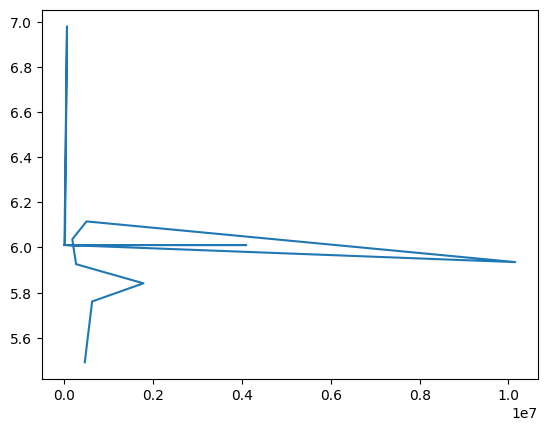